In [11]:
import numpy as np
from icecream import ic
from tqdm import tqdm


### Defining 2 functions for testing (we should use the one the professor provided in the final code)

In [12]:
#true functions for 2 and 3 variables
def true_f(x: np.ndarray) -> np.ndarray:
    return x[0] + np.sin(x[1]) / 5
def true_f2(x: np.ndarray) -> np.ndarray:
    return x[0] + np.sin(x[1]) / 5 + x[0] * x[2] / 10

In [13]:

# Define constants for dataset sizes.
TEST_SIZE = 10_000
TRAIN_SIZE = 100

# This function generates a problem dataset for true_f.
def gen_problem():
    # Generate a 2D validation set where x[0] and x[1] are random samples within specified ranges.
    x_validation = np.vstack(
        [
            np.random.random_sample(size=TEST_SIZE) * 2 * np.pi - np.pi,  # x[0] in range [-pi, pi]
            np.random.random_sample(size=TEST_SIZE) * 2 - 1,             # x[1] in range [-1, 1]
        ]
    )
    
    # Calculate the true outputs for the validation set using true_f.
    y_validation = true_f(x_validation)

    # Randomly select indexes for training data.
    train_indexes = np.random.choice(TEST_SIZE, size=TRAIN_SIZE, replace=False)

    # Extract training data using selected indexes.
    x_train = x_validation[:, train_indexes]
    y_train = y_validation[train_indexes]

    # Verify that y_train matches true_f applied to x_train.
    assert np.all(y_train == true_f(x_train)), "D'ho"

    return x_train, y_train

# This function generates a problem dataset for true_f2.
def gen_problem2():
    # Generate a 3D validation set where x[0], x[1], and x[2] are random samples within specified ranges.
    x_validation = np.vstack(
        [
            np.random.random_sample(size=TEST_SIZE) * np.exp(3) - np.exp(1),  # x[0] in range [e^1, e^3]
            np.random.random_sample(size=TEST_SIZE) * 2 - 1,                 # x[1] in range [-1, 1]
            np.random.random_sample(size=TEST_SIZE) * 57 - 1,               # x[2] in range [-1, 56]
        ]
    )

    # Calculate the true outputs for the validation set using true_f2.
    y_validation = true_f2(x_validation)

    # Randomly select indexes for training data.
    train_indexes = np.random.choice(TEST_SIZE, size=TRAIN_SIZE, replace=False)

    # Extract training data using selected indexes.
    x_train = x_validation[:, train_indexes]
    y_train = y_validation[train_indexes]

    # Verify that y_train matches true_f2 applied to x_train.
    assert np.all(y_train == true_f2(x_train)), "D'ho"

    return x_train, y_train

# Uncomment these lines to save and load a problem dataset.
# np.savez('problem_0.npz', x=x_train, y=y_train)
# problem = np.load('problem_0.npz')
# x = problem['x']
# y = problem['y']

# Generate a problem dataset using gen_problem2.
problem = gen_problem2()
x = problem[0]  # Training inputs.
y = problem[1]  # Training outputs.

# Determine the number of variables in the training inputs.
number_vars = x.shape[0]

# Compute the Mean Squared Error between outputs from my_f and true outputs.



### Getting numpy functions

In [14]:
unary_ops = [
    np.negative,
    np.abs,
    np.sqrt,
    np.exp,
    np.log,
    np.sin,
    np.cos,
    np.tan,
    np.arcsin,
    np.arccos,
    np.arctan,
    np.ceil,
    np.floor
]

binary_ops = [
    np.add,
    np.subtract,
    np.multiply,
    np.divide,
    np.power,
    np.maximum,
    np.minimum,
    np.mod
]


### Symbolic regression

 28%|██▊       | 28/100 [00:20<00:46,  1.55it/s]

Ho iniziato a takeovere dopo 27 generazioni


 87%|████████▋ | 87/100 [00:58<00:08,  1.52it/s]

Ho smesso di takeovere dopo 86 generazioni


100%|██████████| 100/100 [01:11<00:00,  1.39it/s]

np.add(np.minimum(x1, -5.166771775759102), np.add(np.add(x2, np.divide(46.90523938618736, -5.166771775759102)), np.divide(np.multiply(x0, 46.90523938618736), np.maximum(3.957614350693845, 21.17512340720289))))
Best Fitness: 137.98417331970563
Best Fitness History: [297.3074070275283, 292.4924204088368, 287.5180206087485, 286.46499029296245, 285.5810292640969, 284.77146353279977, 284.18348553456025, 284.16231492421394, 283.8091288982168, 283.79980442619706, 283.79370767314026, 283.7926246732149, 222.93390029979324, 221.7530139349183, 221.37557836568524, 211.3919748635656, 165.48727218581152, 165.4604051545333, 144.72166096157176, 144.51634811280886, 137.98417331970563], changed 21 times
Best Tree:


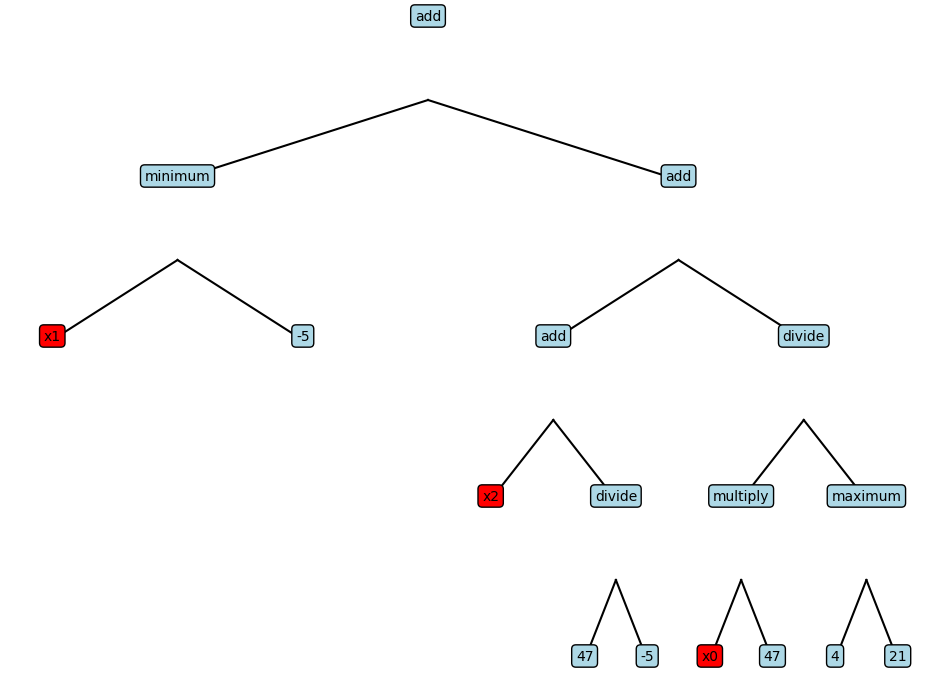

In [ ]:
from tree import Tree

class SymbolicRegression:
    def __init__(self, population_size, max_generations, mutation_rate, grow_full_ratio):
        self.population_size = population_size
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.best_fitness_history = []
        self.unary_ops = unary_ops
        self.binary_ops = binary_ops
        self.grow_full_ratio = grow_full_ratio

        self.population = [Tree("grow") for _ in range(int(population_size*self.grow_full_ratio))] + [Tree("full") for _ in range(int(population_size*(1-self.grow_full_ratio)))]

    

    def select_parents(self):
        return np.random.choice(self.population, 2)
    
    def select_parents_tournament(self):
        tournament_size = 7
        tournament = list(np.random.choice(self.population, tournament_size))
        tournament.sort(key=lambda x: x.fitness)
        return tournament[0], tournament[1]


    def mutate(self, tree):
        if np.random.rand() < self.mutation_rate:
            if np.random.rand() < 0.5:
                tree.mutate_subtree()
            else:
                tree.mutate_single_node()

    def evolve(self):
        best_tree = None
        best_fitness = np.inf
        take_over = False
        for generation in tqdm(range(self.max_generations)):
            new_population = []

            for _ in range(int(self.population_size)):
                parent1, parent2 = self.select_parents_tournament()
                offspring1,offspring2=Tree.crossover(parent1, parent2)
                if(offspring1 is not None or offspring2 is not None):
                    Tree.collapse_branch(offspring1.root)
                    Tree.collapse_branch(offspring2.root)
                
                    self.mutate(offspring1)
                    self.mutate(offspring2)
        
                    new_population.append(offspring1)
                    new_population.append(offspring2)

            self.population += new_population
            for tree in self.population:
                tree.compute_fitness()
            generation_fitnesses = [tree.fitness for tree in self.population]
            generation_best_fitness = min(generation_fitnesses)

            if generation_best_fitness < best_fitness:
                best_fitness = generation_best_fitness
                best_tree = self.population[np.argmin(generation_fitnesses)]
                self.best_fitness_history.append(best_fitness)
            #trim the population to the best population_size
            self.population.sort(key=lambda x: x.fitness)
            self.population = self.population[:self.population_size]
            # print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")
            n_best = [elem for elem in self.population if elem.fitness == self.population[0].fitness]
            if len(n_best) > 0.9 * self.population_size:
                if(not take_over):
                    take_over = True
                    print(f"Start takeover after {generation} gen")
            elif take_over:
                take_over = False
                print(f"Stop takeover after {generation} gen")
        return best_tree, best_fitness


TREE_DEPTH = 5
Tree.set_params(unary_ops, binary_ops, 3, 100,TREE_DEPTH, x, y)
regressor = SymbolicRegression(
    population_size=130,
    max_generations=100,
    mutation_rate=0.1,
    grow_full_ratio=0.6
)


best_tree, best_fitness = regressor.evolve()
print(best_tree.to_np_formula())
print(f"Best Fitness: {best_fitness}")
print(f"Best Fitness History: {regressor.best_fitness_history}, changed {len(regressor.best_fitness_history)} times")
print("Best Tree:")
best_tree.add_drawing()



# print(x.shape)
# # print(x)
# # print([x[0][0]]+[x[1][0]]+[x[2][0]])
# print(x[2][0])
# print(regressor.population[0].fitness)
# regressor.population[0].print_tree()
# print(regressor.population[0].evaluate_tree([x[0][0]]+[x[1][0]]+[x[2][0]]))
# print(regressor.population[0].evaluate_tree(x[:,0]))
# print("Best Tree:")
# best_tree.print_tree()
# print(f"Best Fitness: {best_fitness}")
